# Clase 27/08: _Data Analytics_

### 1. Proceso de la _ciencia de datos_
- Definicion del Problema
- Recoleccion de datos
- Exploracion y preparacion de los datos
- Analisis de datos y modelado
- Interpretacion y comunicacion de resultados
- Implementacion y monitoreo

### 2. _ETL_: Extract, Transform, Load
- Extraemos datos de multiples fuentes. Por ejemplo: Base de datos, .xlsx, .csv, etc.
- Transformacion de los datos. Esto puede incluir actividades como: Filtrar, Eliminar, Reemplazar, etc.
- Carga de los datos o __load__. Este es el proceso final de la __ETL__ donde los datos quedan listos para su analisis

### 3. Proceso de Adquisicion de los datos
- Fuente de datos
- Calidad de los datos
- Importancia de la adquision

#### 3.1 Pasos Escenciales en la adquisicion de los datos
    1) Identificacion de fuentes
    2) Recopilacion de datos
    3) Almacenamiento seguro
    4) Documentacion
    5) Limpieza y procesamiento
    6) Transformacion de los datos

#### 3.2 Desafios y responsabilidades eticas en la adquisicion de los datos
- Manejo de grandes volumenes
- Representatividad de los datos
- Privacidad y seguridad
- Consentimiento informado

#### 3.3 Importancia y calidad de los datos
- Precision
- Complejidad
- Representatividad

### 4. Evaluacion de la calidad de los datos
- Unicidad
- Completitud
- Consistencia
- Oportunidad
- Validez
- Precision

### 5. Tipos de datos
- Datos secundarios
- Datos primarios
- Datos internos
- Datos externos
- Datos categoricos
- Datos numericos
- Datos ordinales
- Datos de intervalo
- Datos de Razon

## Actividad I: Ventas y exploracion

In [52]:
# Importar libreria pandas
import pandas as pd

# Creo el dataframe sobre la planilla proporcionada: ventas_exploracion
excel_path = r'C:\Users\julie\OneDrive - Universidad Católica de Santiago del Estero\Escritorio\ITSE\First module\Data science I\Classes\Class 3\ventas_exploracion.xlsx'
ventas_exploracion_bd = pd.read_excel(excel_path, "ventas")
ventas_exploracion_bd.style



Matplotlib is building the font cache; this may take a moment.


,plk-invoice-number,xyz-branch,city-ghh-998,type-usr-search,gender,category-catalog-dsp,cost of goods sold,sale,dateddmmyyy,time,payment-type-full
0,750-67-8428,A,Nueva York,Member,Female,Health and beauty,522.83,5489715,2019-05-01 00:00:00,13:08:00,Ewallet
1,226-31-3081,C,Houston,Normal,Female,Electronic accessories,76.4,80.22,2019-08-03 00:00:00,10:29:00,Cash
2,631-41-3108,A,Nueva York,Normal,Male,Home and lifestyle,324.31,3405255,2019-03-03 00:00:00,13:23:00,Credit card
3,123-19-1176,A,Nueva York,Member,Male,Health and beauty,465.76,489048,1/27/2019,20:33:00,Ewallet
4,373-73-7910,A,Nueva York,Normal,Male,Sports and travel,604.17,6343785,2019-08-02 00:00:00,10:37:00,Ewallet
5,699-14-3026,C,Houston,Normal,Male,Electronic accessories,597.73,6276165,3/25/2019,18:30:00,Ewallet
6,355-53-5943,A,Nueva York,Member,Female,Electronic accessories,413.04,433692,2/25/2019,14:36:00,Ewallet
7,315-22-5665,C,Houston,Normal,Female,Home and lifestyle,735.6,772.38,2/24/2019,11:38:00,Ewallet
8,665-32-9167,A,Nueva York,Member,Female,Health and beauty,72.52,76146,2019-10-01 00:00:00,17:15:00,Credit card
9,692-92-5582,B,Chicago,Member,Female,Food and beverages,164.52,172746,2/20/2019,13:27:00,Credit card


In [94]:
# Unificar los tipos de dato fecha

ventas_exploracion_bd['dateddmmyyy'] = pd.to_datetime(ventas_exploracion_bd['dateddmmyyy'], errors='coerce')

ventas_exploracion_bd.style

,plk-invoice-number,xyz-branch,city-ghh-998,type-usr-search,gender,category-catalog-dsp,cost of goods sold,sale,dateddmmyyy,time,payment-type-full
0,750-67-8428,A,Nueva York,Member,Female,Health and beauty,522.83,5489715,2019-05-01 00:00:00,13:08:00,Ewallet
1,226-31-3081,C,Houston,Normal,Female,Electronic accessories,76.4,80.22,2019-08-03 00:00:00,10:29:00,Cash
2,631-41-3108,A,Nueva York,Normal,Male,Home and lifestyle,324.31,3405255,2019-03-03 00:00:00,13:23:00,Credit card
3,123-19-1176,A,Nueva York,Member,Male,Health and beauty,465.76,489048,2019-01-27 00:00:00,20:33:00,Ewallet
4,373-73-7910,A,Nueva York,Normal,Male,Sports and travel,604.17,6343785,2019-08-02 00:00:00,10:37:00,Ewallet
5,699-14-3026,C,Houston,Normal,Male,Electronic accessories,597.73,6276165,2019-03-25 00:00:00,18:30:00,Ewallet
6,355-53-5943,A,Nueva York,Member,Female,Electronic accessories,413.04,433692,2019-02-25 00:00:00,14:36:00,Ewallet
7,315-22-5665,C,Houston,Normal,Female,Home and lifestyle,735.6,772.38,2019-02-24 00:00:00,11:38:00,Ewallet
8,665-32-9167,A,Nueva York,Member,Female,Health and beauty,72.52,76146,2019-10-01 00:00:00,17:15:00,Credit card
9,692-92-5582,B,Chicago,Member,Female,Food and beverages,164.52,172746,2019-02-20 00:00:00,13:27:00,Credit card


In [54]:
# Importo librerias que usare para la creacion del grafico de barras
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Contar la frecuencia de cada lugar de venta
lugar_venta_counts = ventas_exploracion_bd['city-ghh-998'].value_counts().reset_index()
lugar_venta.columns = ['city-ghh-998', 'Cantidad']
print(lugar_venta_counts.columns)

Index(['city-ghh-998', 'count'], dtype='object')


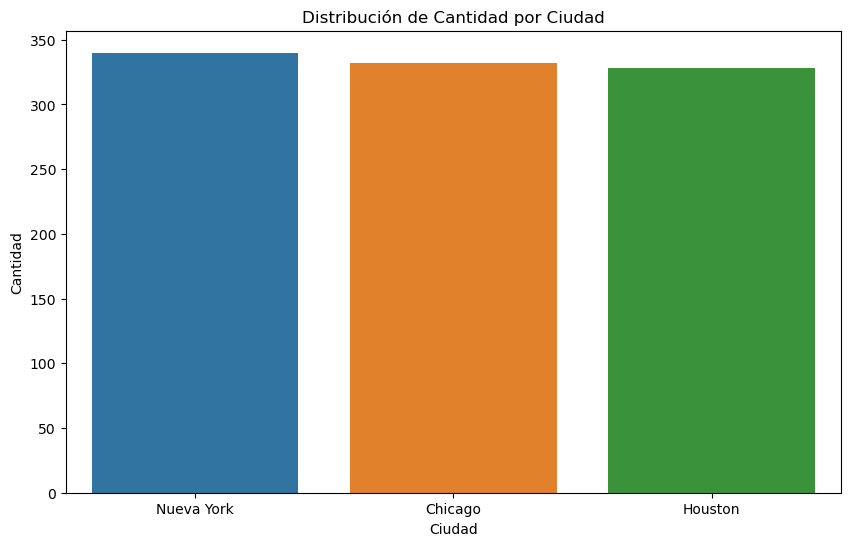

In [80]:
# Colores para el grafico de barras (1 color para cada modo)
colores = colores[:lugar_venta_counts['city-ghh-998'].nunique()]

# Crear el grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='city-ghh-998', y='count', data=lugar_venta_counts, hue='city-ghh-998', palette=colores, dodge=False)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.title('Distribución de Cantidad por Ciudad')
plt.show()

In [82]:
# Cantidad de medios de pago

# Contar la frecuencia de cada lugar de venta
tipo_pago = ventas_exploracion_bd['payment-type-full'].value_counts().reset_index()
tipo_pago.columns = ['payment-type-full', 'Cantidad']
print(tipo_pago.columns)


Index(['payment-type-full', 'Cantidad'], dtype='object')


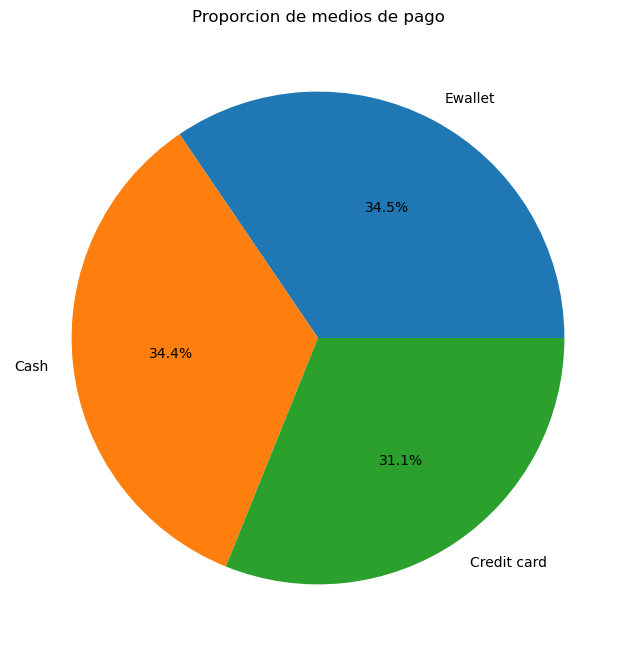

In [86]:
# Mostrar grafico de tortas
plt.figure(figsize=(8, 8))
plt.pie(tipo_pago['Cantidad'], labels=tipo_pago['payment-type-full'], colors=colores, autopct='%1.1f%%')
plt.title('Proporcion de medios de pago')
plt.show()


In [108]:
# Limpiar datos de ventas

# Funcion para limpiar y convertir los valores a numericos
def limpiar_recaudacion(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '')  # Eliminar puntos (para miles)
        valor = valor.replace(',', '.')  # Reemplazar comas por puntos (para decimales)
    return pd.to_numeric(valor, errors='coerce')  # Convertir a numerico, convertir errores a NaN

# Aplicar la funcion a la columna 'sale'
ventas_exploracion_bd['sale'] = ventas_exploracion_bd['sale'].apply(limpiar_recaudacion)

# Seleccionar las columnas relevantes
df_relevant = ventas_exploracion_bd[['category-catalog-dsp', 'sale']]

# Ordenar por recaudación en orden descendente
df_relevant = ventas_exploracion_bd.groupby('category-catalog-dsp', as_index=False).agg({'sale': 'sum'})

df_relevant.style


,category-catalog-dsp,sale
0,Electronic accessories,153447336.000000
1,Fashion accessories,146453286.000000
2,Food and beverages,122120586.000000
3,Health and beauty,165829230.000000
4,Home and lifestyle,137036466.000000
5,Sports and travel,151945731.000000
